## It's use when your data (column) is Skewed (not Normaly distributed).


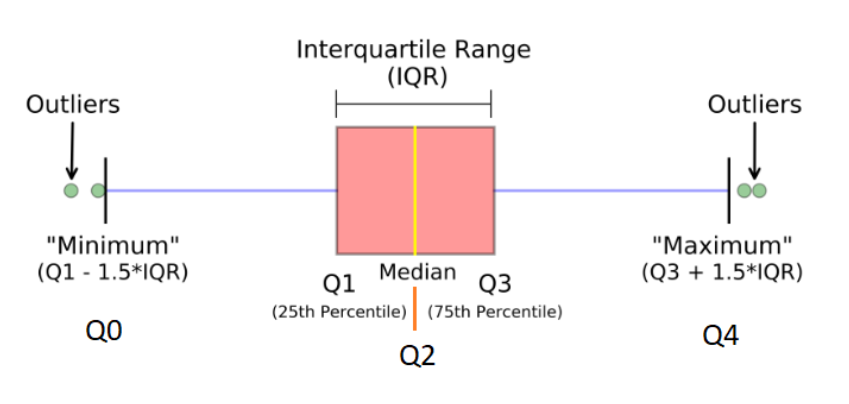

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Aditya kumar Dubey\OneDrive\Apps\Documents\Desktop\Data\placement_marks.csv")

In [3]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


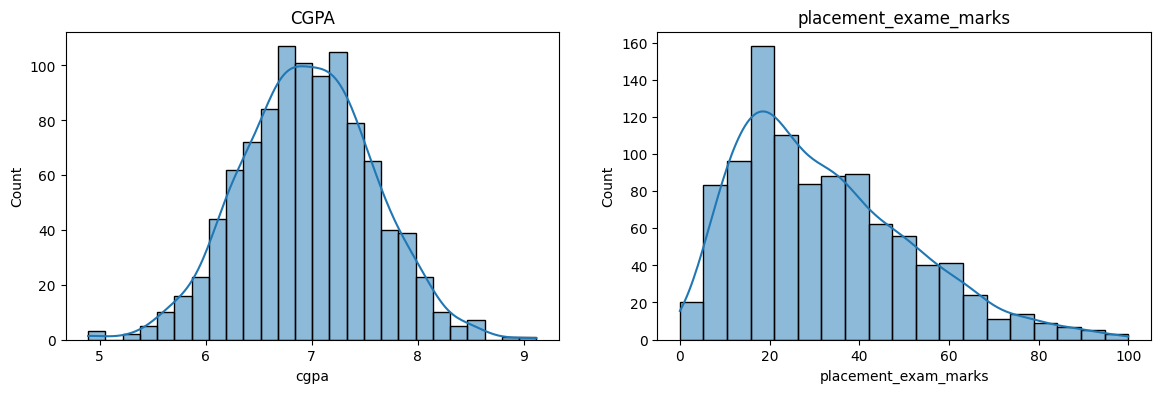

In [7]:
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.histplot(df['cgpa'],kde=True)
plt.title('CGPA')

plt.subplot(122)
sns.histplot(df['placement_exam_marks'],kde = True)
plt.title('placement_exame_marks')
plt.show()

In [8]:
df['cgpa'].skew()

np.float64(-0.014529938929314918)

In [10]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [11]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

In [54]:
print("Mean value of placement_exam_marks ",df['placement_exam_marks'].mean())
print("Std value of placement_exam_marks ", df['placement_exam_marks'].std())
print("Min value of placement_exam_marks ", df['placement_exam_marks'].min())
print("Max Value of placement_exam_marks", df['placement_exam_marks'].max())

Mean value of placement_exam_marks  32.225
Std value of placement_exam_marks  19.13082233892112
Min value of placement_exam_marks  0.0
Max Value of placement_exam_marks 100.0


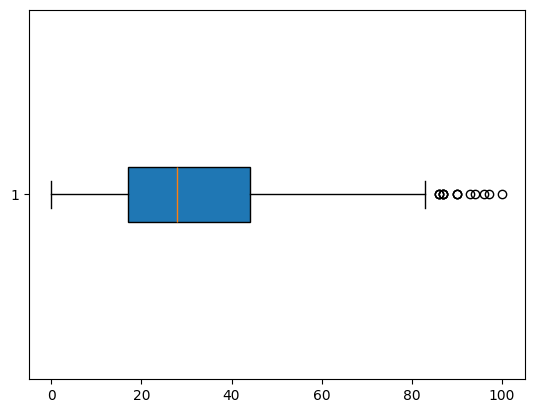

In [18]:
plt.boxplot(df['placement_exam_marks'],patch_artist=True,vert=False)
plt.show()

In [19]:
# Finding the Iqr

percentile25 = df["placement_exam_marks"].quantile(0.25)
percentile75 = df["placement_exam_marks"].quantile(0.75)

In [20]:
percentile25

np.float64(17.0)

In [21]:
percentile75

np.float64(44.0)

In [25]:
iqr = percentile75 - percentile25

In [26]:
iqr

np.float64(27.0)

In [27]:
upper_limit = percentile75 + 1.5 *iqr
lower_limit = percentile25 - 1.5 *iqr

In [30]:
print('upper',upper_limit)
print('lower',lower_limit)

upper 84.5
lower -23.5


In [32]:
df[df["placement_exam_marks"]> upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [33]:
df[df["placement_exam_marks"] < lower_limit]

,cgpa,placement_exam_marks,placed


# Trimming

In [34]:
new_df = df[df["placement_exam_marks"] < upper_limit]

In [35]:
new_df.shape

(985, 3)

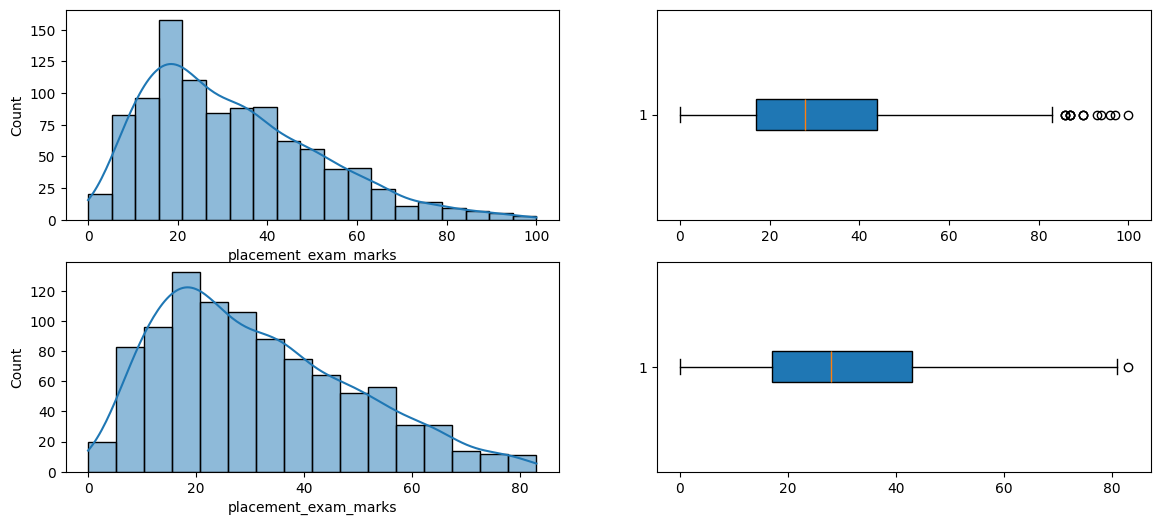

In [45]:
# comparing

plt.figure(figsize = (14,6))
plt.subplot(221)
sns.histplot(df["placement_exam_marks"],kde=True)

plt.subplot(222)
plt.boxplot(df["placement_exam_marks"],patch_artist=True,vert=False)


plt.subplot(223)
sns.histplot(new_df["placement_exam_marks"], kde = True)

plt.subplot(224)
plt.boxplot(new_df["placement_exam_marks"],patch_artist=True,vert=False)

plt.show()

# Capping

In [49]:
new_df_cap = df.copy()


new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap["placement_exam_marks"] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

# np.where(condition,true,fales)

In [51]:
new_df_cap.shape

(1000, 3)

In [53]:
new_df_cap.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.136500,0.489000
std,0.615898,18.865419,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,84.500000,1.000000


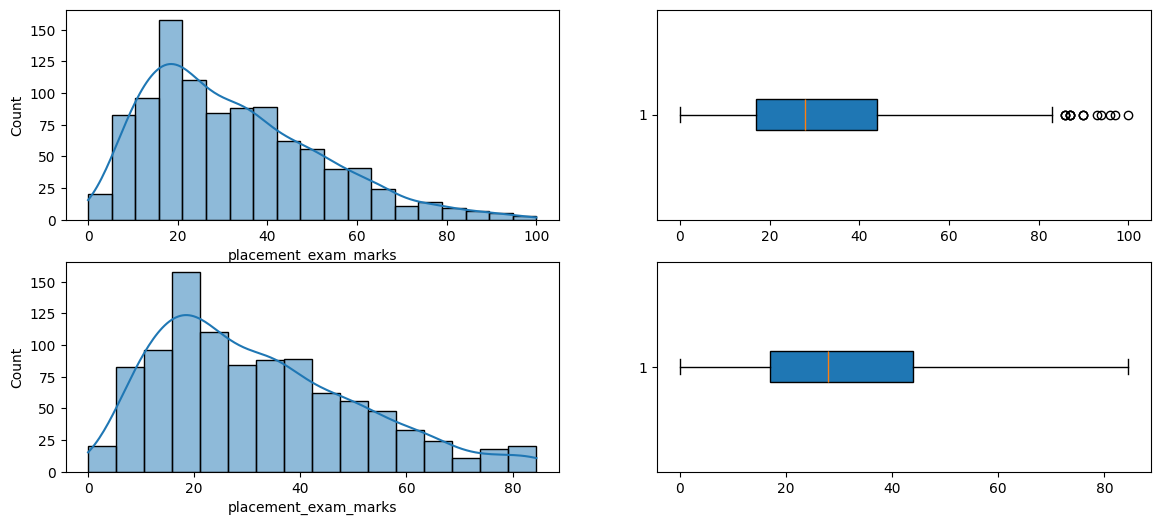

In [56]:
plt.figure(figsize = (14,6))
plt.subplot(221)
sns.histplot(df["placement_exam_marks"],kde=True)

plt.subplot(222)
plt.boxplot(df["placement_exam_marks"],patch_artist=True,vert=False)


plt.subplot(223)
sns.histplot(new_df_cap["placement_exam_marks"], kde = True)

plt.subplot(224)
plt.boxplot(new_df_cap["placement_exam_marks"],patch_artist=True,vert=False)

plt.show()